In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/Yorko/mlcourse.ai/raw/main/data/mlbootcamp5_train.csv', sep=';',index_col='id')

In [2]:
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1
13,17668,1,158,71.0,110,70,1,1,0,0,1,0


Завдання 1. Скільки чоловіків і жінок представлено в цьому наборі
даних? Не було дано опису ознаки «стать» (якої статі відповідає 1, а якої - 2 в
ознаці gender) - це можна визначити подивившись на зріст, при розумному
припущенні в середньому чоловіки вище

In [3]:
df["gender"] = df["gender"].astype("category")
dfByGender = df.groupby("gender")
genderIdSortedByAverageHeight = dfByGender["height"].mean().sort_values(ascending = False).index.values
mapping = [[gender, "man"] if index % 2 == 0 else [gender, "woman"] for index, gender in enumerate(genderIdSortedByAverageHeight)]
df["gender"] = df["gender"].cat.rename_categories(dict(mapping))
dfByGender = df.groupby("gender")
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,man,168,62.0,110,80,1,1,0,0,1,0
1,20228,woman,156,85.0,140,90,3,1,0,0,1,1
2,18857,woman,165,64.0,130,70,3,1,0,0,0,1
3,17623,man,169,82.0,150,100,1,1,0,0,1,1
4,17474,woman,156,56.0,100,60,1,1,0,0,0,0
8,21914,woman,151,67.0,120,80,2,2,0,0,0,0
9,22113,woman,157,93.0,130,80,3,1,0,0,1,0
12,22584,man,178,95.0,130,90,3,3,0,0,1,1
13,17668,woman,158,71.0,110,70,1,1,0,0,1,0


In [4]:
dfByGender.size()

gender
woman    45530
man      24470
dtype: int64

Завдання 2. Хто в середньому рідше вказує, що вживає алкоголь -
чоловіки чи жінки?

In [5]:
dfByGender["alco"].mean()

gender
woman    0.025500
man      0.106375
Name: alco, dtype: float64

Завдання 3. У скільки разів (округлити, round) відсоток курців серед
чоловіків більше, ніж відсоток курців серед?

In [6]:
filteredDfByGender = df[df["smoke"] == 1].groupby("gender")
print(filteredDfByGender.size())
print(dfByGender.size())
percent_of_smokers_per_gender = filteredDfByGender.size() / dfByGender.size() * 100
print(percent_of_smokers_per_gender)
result = percent_of_smokers_per_gender["man"] / percent_of_smokers_per_gender["woman"]
print(f"Result: {round(result)}")

gender
woman     813
man      5356
dtype: int64
gender
woman    45530
man      24470
dtype: int64
gender
woman     1.785636
man      21.888026
dtype: float64
Result: 12


Завдання 4. У кого в середньому тиск вище, у жінок чи чоловіків.

In [8]:
dfByGender["ap_hi"].mean()

gender
woman    128.139249
man      130.078872
Name: ap_hi, dtype: float64

In [9]:
dfByGender["ap_lo"].mean()

gender
woman     94.522776
man      100.551982
Name: ap_lo, dtype: float64

Завдання 5. В чому вимірюється вік? На скільки місяців (приблизно)
відрізняються медіанне значення віку курців і тих хто не курить?

In [11]:
print(round(df["age"]/12/30).describe())
df_by_smoke = df.groupby("smoke")
age_median_by_smoke = round(df_by_smoke["age"].median()/12)
abs(age_median_by_smoke[0] - age_median_by_smoke[1])

count    70000.000000
mean        54.077900
std          6.858852
min         30.000000
25%         49.000000
50%         55.000000
75%         59.000000
max         66.000000
Name: age, dtype: float64


50.0

Завдання 6

In [12]:
df["age_years"] = round(df["age"]/12/30)
df["cardio_decease_group"] = "excluded" # not used for data

smoking_man_60_to_64 = df[(df["gender"] == "man") & (df["age_years"] <= 64) & (df["age_years"] >= 60) & (df["smoke"] == 1)]

low_smoking_man_60_to_64 = smoking_man_60_to_64[(smoking_man_60_to_64["ap_hi"] < 120) & (smoking_man_60_to_64["cholesterol"] == 1)]
df.loc[low_smoking_man_60_to_64.index.tolist(), 'cardio_decease_group'] = "low_risk"
high_smoking_man_60_to_64 = smoking_man_60_to_64[(smoking_man_60_to_64["ap_hi"] >= 160) & (smoking_man_60_to_64["cholesterol"] == 3)]
df.loc[high_smoking_man_60_to_64.index.tolist(), 'cardio_decease_group'] = "high_risk"

target = df[df['cardio_decease_group'] != "excluded"]
target_by_cardio_decease_group = target.groupby("cardio_decease_group")
ill_target = target[target["cardio"] == 1]
ill_target_by_cardio_decease_group = ill_target.groupby("cardio_decease_group")

ill_to_risk_percentage = ill_target_by_cardio_decease_group.size() / target_by_cardio_decease_group.size() * 100
round(ill_to_risk_percentage["high_risk"] / ill_to_risk_percentage["low_risk"])

4

Завдання 7. Побудуйте нову ознаку - BMI (Body Mass Index). Для
цього треба вагу у кілограмах поділити на квадрат зросту в метрах.
Нормальними вважаються значення BMI від 18.5 до 25.

In [13]:
df["BMI"] = df["weight"] / ((df["height"] / 100)**2)
print("{}\n".format(df["BMI"].describe()))
first = df["BMI"].median() > 25
print(f"1. Median exceeds norm: {first}\n\n")

mean_bmi_by_gender = round(dfByGender["BMI"].mean())
print("{}\n".format(mean_bmi_by_gender))
second = mean_bmi_by_gender["woman"] < mean_bmi_by_gender["man"]
print(f"2. Mean BMI for women is lower than for men: {second}\n\n")


mean_bmi_by_ill = round(df.groupby("cardio")["BMI"].mean())
print("{}\n".format(mean_bmi_by_ill))
third = mean_bmi_by_ill[0] > mean_bmi_by_ill[1]
print(f"2. Mean BMI for healthy people is higher than that for ill: {third}")

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

1. Median exceeds norm: True


gender
woman    28.0
man      27.0
Name: BMI, dtype: float64

2. Mean BMI for women is lower than for men: False


cardio
0    27.0
1    29.0
Name: BMI, dtype: float64

2. Mean BMI for healthy people is higher than that for ill: False


Завдання 8.

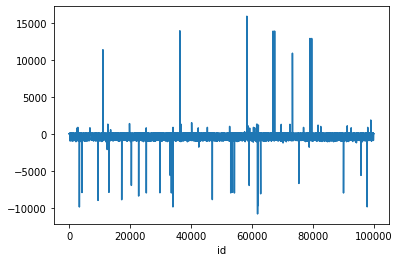

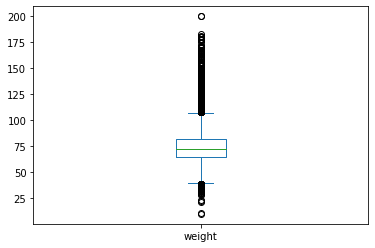

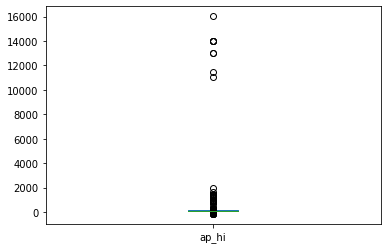

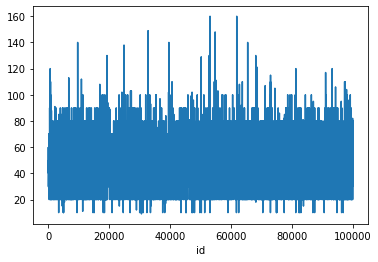

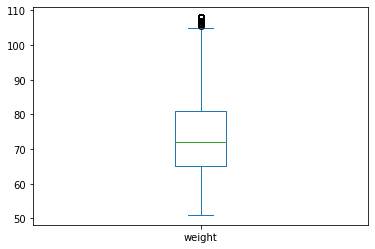

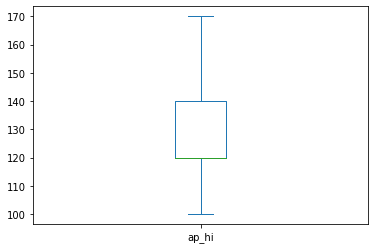

size before: 70000, size after: 63941, removed in percents: 9


In [14]:
import matplotlib.pyplot as plt

(df["ap_hi"]-df["ap_lo"]).plot()
plt.show()
df["weight"].plot.box()
plt.show()
df["ap_hi"].plot.box()
plt.show()

weight_limit = df["weight"].quantile([0.025, 0.975])
pressure_limit = df["ap_hi"].quantile([0.025, 0.975])
filtered = df[
    (df["ap_hi"] > df["ap_lo"]) &
    (df["weight"] >= weight_limit[0.025]) & (df["weight"] <= weight_limit[0.975]) & 
    (df["ap_hi"] >= pressure_limit[0.025]) & (df["ap_hi"] <= pressure_limit[0.975])
]

(filtered["ap_hi"]-filtered["ap_lo"]).plot()
plt.show()
filtered["weight"].plot.box()
plt.show()
filtered["ap_hi"].plot.box()
plt.show()

print(f"size before: {len(df)}, size after: {len(filtered)}, removed in percents: {round((len(df) - len(filtered)) * 100 / len(df))}")
dff = df.copy().loc[filtered.index.tolist()]

Завдання 9. Скільки чоловіків і жінок мають зайву вагу?

In [15]:
dff["obesity_group"] = "normal"
dff["obesity_group"] = dff["obesity_group"].astype("category")
dff["obesity_group"] = dff["obesity_group"].cat.add_categories(["obesity_0", "obesity_1", "obesity_2", "obesity_3"])
dff.loc[dff[(dff["BMI"] >= 25) & (dff["BMI"] <= 29.9)].index.tolist(), "obesity_group"] = "obesity_0"
dff.loc[dff[(df["BMI"] >= 30) & (dff["BMI"] <= 34.9)].index.tolist(), "obesity_group"] = "obesity_1"
dff.loc[dff[(df["BMI"] >= 35) & (dff["BMI"] <= 39.9)].index.tolist(), "obesity_group"] = "obesity_2"
dff.loc[dff[dff["BMI"] >= 40].index.tolist(), "obesity_group"] = "obesity_3"


dff.groupby(["gender", "obesity_group"]).size()

<ipython-input-15-63a4a6bd2e09>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff.loc[dff[(df["BMI"] >= 30) & (dff["BMI"] <= 34.9)].index.tolist(), "obesity_group"] = "obesity_1"
<ipython-input-15-63a4a6bd2e09>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dff.loc[dff[(df["BMI"] >= 35) & (dff["BMI"] <= 39.9)].index.tolist(), "obesity_group"] = "obesity_2"


gender  obesity_group
woman   normal           14929
        obesity_0        14564
        obesity_1         8022
        obesity_2         3106
        obesity_3          774
man     normal            9404
        obesity_0         9274
        obesity_1         3309
        obesity_2          509
        obesity_3           50
dtype: int64